# Linear models 

**Scikit-Learn Regression Example**

In this example, we train a linear regression model to predict disease progression one year after baseline.

There are ten baseline variables: age, sex, body mass index (BMI), average blood pressure, and six bvlood serum measurements for n = 442 diabetic patients.

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Load the diabetes dataset
diabetes = datasets.load_diabetes()

# Use only one feature
diabetes_X = diabetes.data[:, np.newaxis, 2]

Split the data set into training and testing sets, by dropping the last 20 observations for the training set (402 observations for training) and keeping the last 20 observations for the testing set (20 observations for testing)

In [3]:
# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes.target[:-20]
diabetes_y_test = diabetes.target[-20:]

Create and train the linear regression object, and make predictions

In [4]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Traing the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)

Output the estimated linear regression coefficients, the mean squared error, and the coefficient of determination (variance score) to understand model fit

Also plot the prediction outputs to visualize model fit

Coefficients: 
 [938.23786125]
Mean squared error: 2548.07
Variance score: 0.47


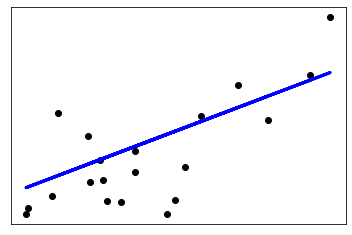

In [5]:
# The coefficients
print('Coefficients: \n', regr.coef_)

# The mean squared error
print('Mean squared error: %.2f' % mean_squared_error(diabetes_y_test, diabetes_y_pred))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(diabetes_y_test, diabetes_y_pred))

# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test, color = 'black')
plt.plot(diabetes_X_test, diabetes_y_pred, color = 'blue', linewidth = 3)

plt.xticks(())
plt.yticks(())

plt.show()

## **Project**

Logistic regression to predict ability of a person to repay a loan

\~\~\~\~\~\~\~\~\~__You only need to run next cell once__\~\~\~\~\~\~\~\~\~

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

\~\~\~\~\~\~\~\~\~\~\~\~\~\~\~\~\~\~\~\~\~\~\~\~\~\~\~\~\~\~\~\~\~\~\~\~\~\~\~\~\~\~\~\~\~\~\~

In this example, we will try out methods of logistic regression to predict binary feature using information from social network.

Imagine you want to make a purchase of item you cannot afford (a new car, gaming console, phone, etc.). In order to approve a loan, banks look at the credit information available on the customer (previous loans, salaries, assets, etc.). If you are a young person, this information may not be available. More recent efforts attempt to introduce data sources that can be used alternatively to assess credit worthiness. That includes data from social networks that can be used to obtain credit score for individuals without tranditional credit sources (which includes young people without credit history).

Your objective in this exersise is to use the data from our randomized social network and obtain the model that provides the best description of ability to obtain loan to buy items. It will include two sub-objectives:

1. Find the best variables to rely on in identifying ability to pay a loan

2. Find the model that provides the best accuracy (the most close to the data) based on testing data

In [ ]:
## Import necessary modules and load the data
%run '/content/gdrive/My Drive/dscamp/dscamp_public/Linear Models/linear_models_helper.py'

The dataset contains a number of fields randomized to generate social network profile:

- 'face_id'- id assocated with profile picture
- 'age' - age of a person
- 'gender' - gender of a person
- 'relationship' - marital status (single, married)
- 'music_genre' - favourite musical genre (random, pre-defined list)
- 'band' - random band name based on 'music_genre' (random, non-existant)
- 'team' - favourite team (random, from list of teams)
- 'first_name' - random first name
- 'last_name' - random last name (relationship=='married' adopts the name of the partner)
- 'education' - education level (random conditional on age, pre-defined list)
- 'education_prompt' - technical field for web page render
- 'work'- employer name (if any, otherwise 'unemployed'; random conditional on 'education', non-existant)
- 'work_prompt' - technical field for web page render
- 'fav_movie_1' - favourite movie (random based on genre, pre-defined list)
- 'fav_movie_2' - favourite movie (random based on genre, pre-defined list; disjoint genre from 'fav_movie_1')
- 'fav_book_1' - favourite book (random, pre-defined list)
- 'fav_book_2' - favourite book (random, pre-defined list)
- 'fav_book_3' - favourite book (random, pre-defined list)
- 'fav_auth_1' - favourite book's author (conditional of fav_book_1)
- 'fav_auth_2' - favourite book's author (conditional of fav_book_2)
- 'fav_auth_3' - favourite book's author (conditional of fav_book_3)
- 'fav_food_1' - favourite dish (random, pre-defined list)
- 'fav_food_2' - favourite dish (random, pre-defined list)
- 'fav_food_3' - favourite dish (random, pre-defined list)
- 'home_city' - home town (random US town)
- 'home_state' - home state (based on 'home_city')
- 'languages' - number of languages person speaks (random, 1-4)
- 'hogwarts' - hogwarts house (random, pre-defined list)
- 'fav_pet' - favourite pet (random, pre-defined list)
- 'vg_genre' - favourite video game genre (random, pre-defined list)
- 'fav_video_game' - favourite video game (random, based on 'vg_genre')
- 'spouse_id' - 'face_id' of spouse
- 'n_friends' - number of friends in the network (degree of a node in the social network graph)
- 'credit' - randomly generate binary variable, credit worthiness

An important part of modeling is proper selection of variables that will explain your model. In our case, we want to find features that will explain the ability to repay a loan. Take a random set of features using knowledge you got from slides to find the best combination of variables.

In [ ]:
##
# List of available features
##
list(data.columns[2:])

['face_id',
 'age',
 'gender',
 'relationship',
 'music_genre',
 'band',
 'team',
 'first_name',
 'last_name',
 'education',
 'education_prompt',
 'work',
 'work_prompt',
 'fav_movie_1',
 'fav_movie_2',
 'fav_book_1',
 'fav_book_2',
 'fav_book_3',
 'fav_auth_1',
 'fav_auth_2',
 'fav_auth_3',
 'fav_food_1',
 'fav_food_2',
 'fav_food_3',
 'home_city',
 'home_state',
 'languages',
 'hogwarts',
 'fav_pet',
 'vg_genre',
 'fav_video_game',
 'spouse_id',
 'n_friends',
 'credit',
 'state']

In [ ]:
##
# One example of using data from hogwarts house (Gryffindor 1, other houses 0), Face ID, and number of languages person speaks
# to predict credit score
##
house = data['hogwarts'] == 'gryffindor' 
data['house'] = [float(i) for i in house]
X = data[['house', 'languages', 'face_id']]

y = data['credit']

In [ ]:
##
# Split train test into 80/20 ratio.
##
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_SEED)

In [ ]:
##
# Fit logistic regression and provide fit summary.
##
lr = sm.Logit(y_train, sm.add_constant(X_train)).fit()
lr.summary()

Optimization terminated successfully.
         Current function value: 0.556890
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 credit   No. Observations:                  800
Model:                          Logit   Df Residuals:                      796
Method:                           MLE   Df Model:                            3
Date:                Wed, 22 Apr 2020   Pseudo R-squ.:                0.002307
Time:                        17:05:11   Log-Likelihood:                -445.51
converged:                       True   LL-Null:                       -446.54
Covariance Type:            nonrobust   LLR p-value:                    0.5600
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.0112      0.252     -4.020      0.000      -1.504      -0.518
house          0.1275      0.191      0.669      0.504      -0.246       0.501
languages      0.0140      0.074      0.191      0.849      -0.130       0.158
face_id       -0.0004      0.000     -1.226      0.220      -0.001       0.000
==============================================================================
"""

In [ ]:
##
# Provide accuracy for the model
##
y_pred = lr.predict(sm.add_constant(X_test)) > 0.5
print("Accuracy: "+ str(accuracy_score(y_test, y_pred)))

Accuracy: 0.79
